In [3]:
from google.colab.patches import cv2_imshow 
from google.colab import drive 
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 영상 형태 변형을 위한 기하학적 변환

영상의 기하학적 변환은 픽셀 좌표들의 위치 변경을 통해 공간을 재배치하여 영상 해성 용이

크기(geometric), 회전(rotation) 대칭(flipping), 이동(translation), 어파인(affine)등의 변환이 있음


영상의 기하학적 변환은 입혁영상의 픽셀 좌표를 행렬 연산을 통해 결과 영상의 픽셀 좌표로  mapping하고, 결과 영상 좌표의 픽셀값을 원영상 좌표에 복사함

이때 입력 영상의 좌표(벡터)에 곱해지는 행렬과 더해지는 행렬의 정의에 때라 결과가 달라짐






forward mapping

기하학적 변환 시, 입력 영상의 좌표에 따라 결과 영상의 좌표가 결정되기 때문에 이를 전방향 매핑이라함



전뱡향 매핑은 홀hole과 오버랩overlap 문제가 있다


홀은 입력영상의 매핑 결과 좌표가 결과 영상에 존재하지 않는 경우

오버랩은 입력 영상의 다른 2개의 픽셀좌표가 결과 영상의 같은 좌표로 매핑되는 경우

이런 문제를 해결하기 위해 역방향backward 매핑 사용

결과 영상의 각 픽셀좌표에 대응되는 입력 영상의 좌표를 역으로 구함으로써 결과 영상을 생성하는 방식

빈틈없이 채워진 매핑되는 결과를 얻을 수 있지만 대응좌표값이 소수로 계산되는 경우가 있음

# Scaling 크기 변환

영상의 크기를 원영상보다 축소하거나 확대하는 변환

크기변환시, 입력 영상에 주대각 성분 외에 모두 0인 대각행렬diagonal matrix를 곱하여 연산

이때 대각행렬의 주대각성분이 1보다 크면 확대, 작으면 축소 

\
위의 매핑 문제를 해결하기 위해 주변의 픽셀값들을 분석하여 대응되지 않은 픽셀에 대해 사로운 픽셀값 생성하는 보간법interpolation 사용

OpenCV에서 보간법을 위해 resize() 함수 제공

보간법 종류
- 최근접 이웃 보간법 nearest neighbor interplation

대응되지 않은 결과 영상의 픽셀값에 대해, 그 픽셀과 가장 가까운 입력영상의 픽셀값으로 복사하여 할당

단순히 픽셀값을 복사하여 처리속도가 빠르나 블록단위로 밝기값 차이가 급변하므로 계단현상aliasing이 쉽게 발생


- 양선형 보간법 biliner interplation

새로운 픽셀값을 생성하기 위해 근처의 이웃(북서, 북동, 남서, 남동)픽셀값들의 가중치 합 계산

계단현상없이 부드러운 결과를 욷을 수 있음

연산시간이 최근접 이웃 보간에 비해 길다

\
    양선형 보간법 수식

    P = (1-a)(1-b)A + a(1-b)B + (1-a)bC + abD

    P: 구해야할 픽셀 값

    A, B, C, D: 북서, 북동, 남서, 남동이웃 픽셀값

    a, 1-a: 픽셀(1x1) 내에서 중앙(P)위치의 좌, 우 거리 값

    b, 1-b: 픽셀(1x1) 내에서 중앙(P)위치의 상, 하 거리 값



최근접 이웃 보간법  구현

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
original image (512, 512)


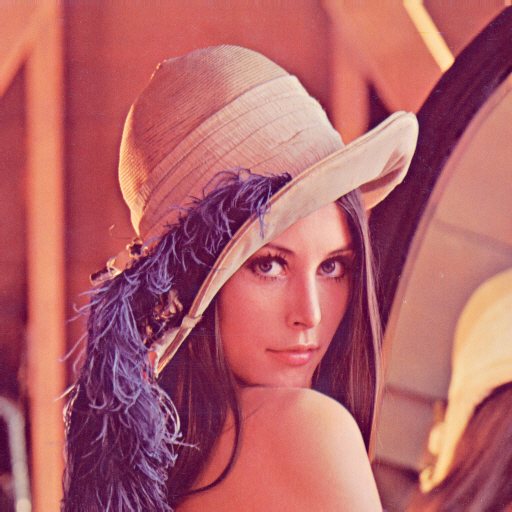

Nearest Neighbor Interpolation (256, 256)


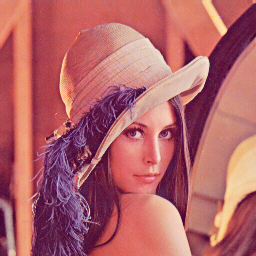

In [ ]:
drive.mount('/content/gdrive') 
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')

height, width = img.shape[:2]
output_img = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_NEAREST)# 가로세로 확대 비율 = 2, INTER_NEAREST = 최근접이웃보간법

print("original image",img.shape[:2] )
cv2_imshow(img)
print("Nearest Neighbor Interpolation",output_img.shape[:2])
cv2_imshow(output_img)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
original image (512, 512)


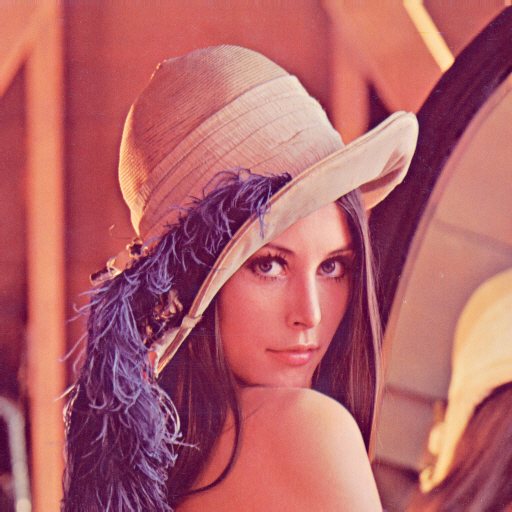

Nearest Neighbor Interpolation (1024, 1024)


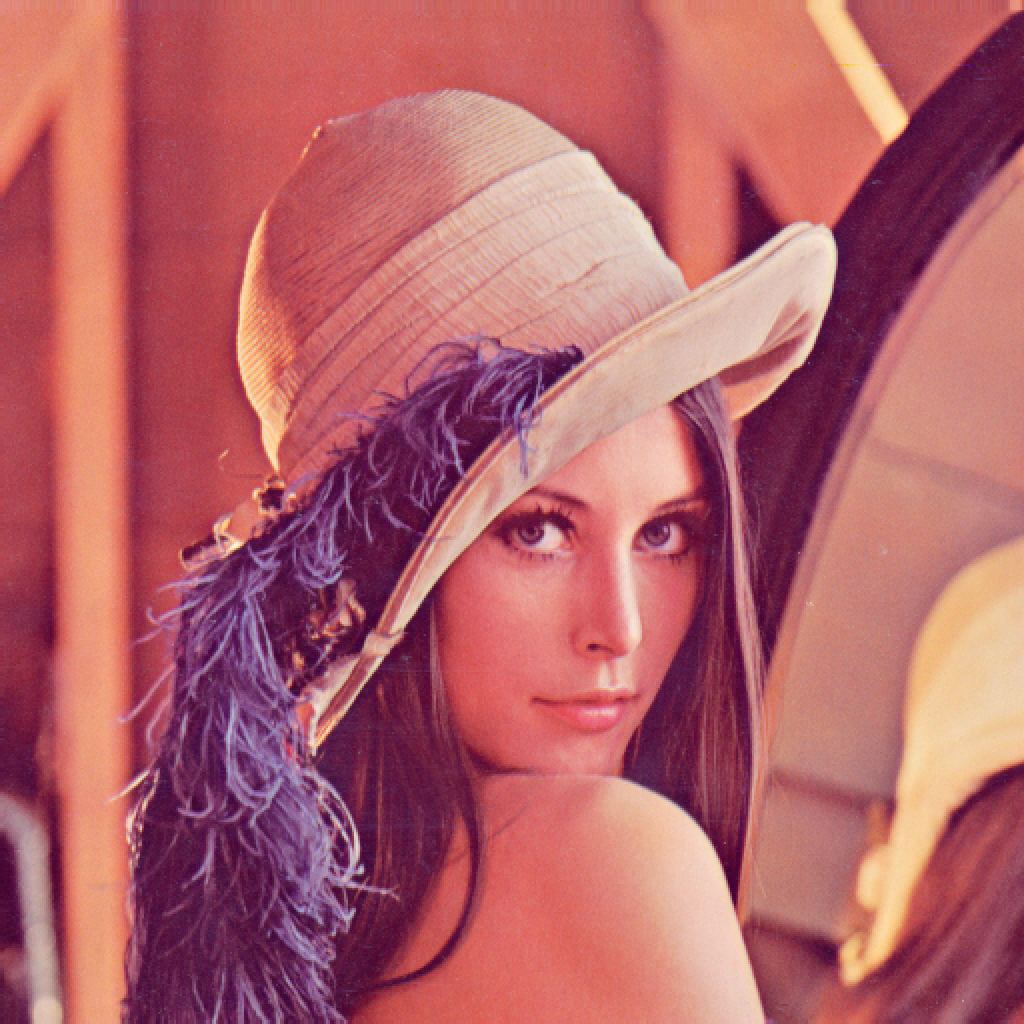

In [ ]:
drive.mount('/content/gdrive') 
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')

height, width = img.shape[:2] # 가로세로 크기 얻고
output_img = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_NEAREST) # 비율대신 목표 영상의 크기 입력, 최근접이웃보간법

print("original image",img.shape[:2])
cv2_imshow(img)
print("Nearest Neighbor Interpolation",output_img.shape[:2])
cv2_imshow(output_img)

양선형 보간법 구현

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
original image (210, 320)


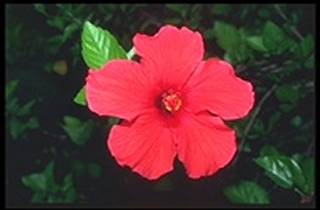

Bilinear Interpolation (105, 160)


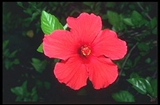

In [ ]:
drive.mount('/content/gdrive') 
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/flower.bmp')

height, width = img.shape[:2]
output_img = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR) # INTER_LINEAR = 양산형 보간법

print("original image",img.shape[:2] )
cv2_imshow(img)
print("Bilinear Interpolation",output_img.shape[:2])
cv2_imshow(output_img)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
original image (210, 320)


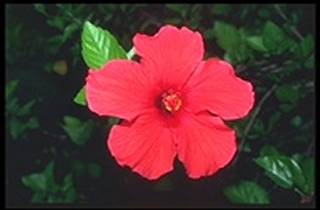

Bilinear Interpolation (420, 640)


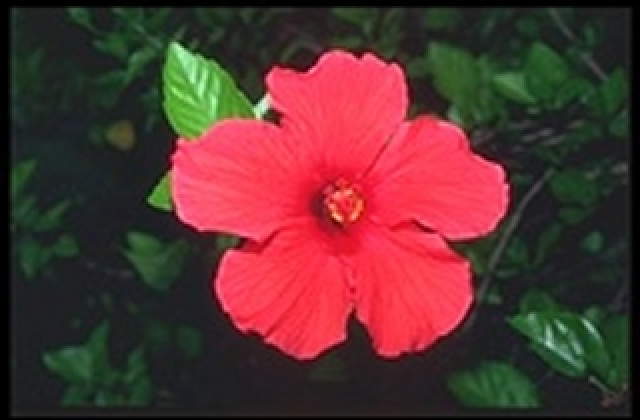

In [ ]:
drive.mount('/content/gdrive') 
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/flower.bmp')

height, width = img.shape[:2]
output_img = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_NEAREST) # 양산형 보간법

print("original image",img.shape[:2] )
cv2_imshow(img)
print("Bilinear Interpolation",output_img.shape[:2])
cv2_imshow(output_img)

# Rotation 회전변환

일정각도로 영상을 영상을 회전시키는 변환으로, 영상 전처리로 많이 이용됨

회전변환 역시 대응되지 않는 픽셀 좌표가 생성되는 것이 가능함

따라서 적절한 보간법을 선택하여 홀을 메꿔야함

1. 입력 영상을 원점 좌표로 이동
2. 원점 좌표를 중심으로 θ각도만큼 회전
3. 다시 원래 좌표로 이동시킴 

OpenCV에서는 getRotationMatrix2D() 함수 제공. 좌측 모서리를 회전원점으로 삼기에 중심점을 중앙으로 변환 필요



회전변환 구현

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Original image (210, 320)


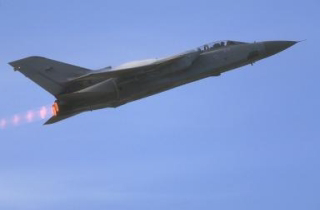

Rotation Transformation (210, 320)


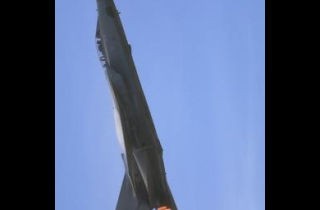

In [5]:
drive.mount('/content/gdrive') 
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/airplane.bmp')

rows,cols = img.shape[:2]

# 회전점을 영상 모서리 -> 영상의 중심으로 변경
M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1) # 회전변환 행렬. 회전 각도90도, 크기변화 없음(1)
output_img = cv2.warpAffine(img,M,(cols*1,rows*1),flags = cv2.INTER_LINEAR)# 입력영상을 M에 곱연산, 양선형보간, 크기변화 없음

print("Original image",img.shape[:2])
cv2_imshow(img)
print("Rotation Transformation",output_img.shape[:2])
cv2_imshow(output_img)

# Flipping transform 대칭변환

대칭변환은 영상을 특정 축이나 점에 대칭시키는 변환으로 

다른 기하학적 변환과 마찬가지로 영상의 전처리에서 많이 사용

\

수직축 x = x0에 대한 대칭 변환은 x2 = -x1+(2*x0), y2 = y1으로 구할 수 있음

수평축 y = y0에 대한 대칭 변환은 y2 = -y1+(2*y0), x2 = x1으로 구할 수 있음

점(x0,y0)에 대한 대칭 변환은 x2 = -x1+(2*x0), y2 = -y1+(2*y0)를 통해 구할 수 있음




특정 축에 대한 대칭 변환 구현

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


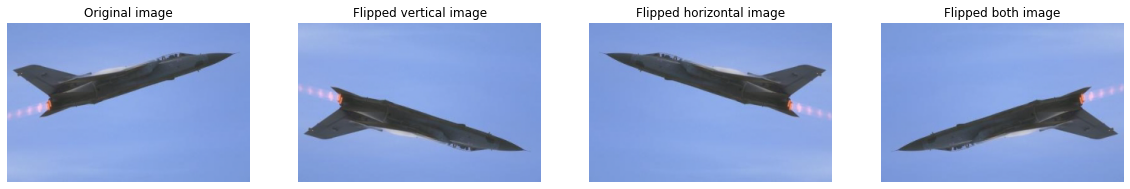

In [6]:
drive.mount('/content/gdrive') 
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/airplane.bmp')
# BGR -> RGB 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

flipVertical = cv2.flip(img, 0)
flipHorizontal = cv2.flip(img, 1)
flipBoth = cv2.flip(img, -1)
 
plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.title("Original image")
plt.imshow(img)
plt.axis("off")
plt.subplot(1,4,2)
plt.title("Flipped vertical image")
plt.imshow(flipVertical)
plt.axis("off")
plt.subplot(1,4,3)
plt.title("Flipped horizontal image")
plt.imshow(flipHorizontal)
plt.axis("off")
plt.subplot(1,4,4)
plt.title("Flipped both image")
plt.imshow(flipBoth)
plt.axis("off")
plt.show()

# Translation 이동변환

입력 영상의 각 요소들을 결과 영상의 새로운 위치로 매핑시키는 변환

입력 영상에 주대각 성분이 1인 대각행렬을 곱하고 이동거리 행렬을 더하여 연산

\

새로운 좌표값이 결과 영상 바깥이면 보통 무시하고 원위치를 검정으로 채움

이때 wrap방식을 써서 보이는 영역 내로 좌표값을 변환할 수 도 있음

\

OpenCV에서 이동변화 함수를 지원해주진 않지만 warpAffine() 함수로 구현 가능하다

인자로 아래 형식의 변환 행렬을 넣고 결과값은 입력의 각 픽셀에 곱한다 (d는 이동거리)

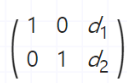



이동변환 구현

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


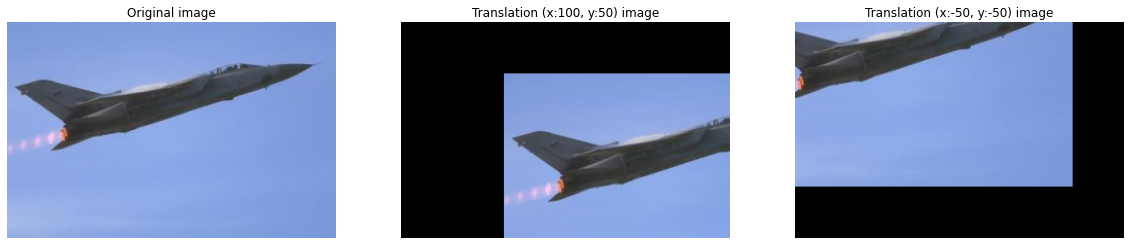

In [ ]:
drive.mount('/content/gdrive') 
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/airplane.bmp')
# BGR -> RGB 변환
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height,width = img.shape[:2] # 입력 영상의 높이x너비
M = np.float32([[1,0,100],[0,1,50]]) # 변환행렬. 가로 100, 세로 50 픽셀만큼 이동. 영상의 (0,0)은 좌측 상단 모서리 
out1 = cv2.warpAffine(img,M,(width,height)) # M이용하여 영상이동
M = np.float32([[1,0,-50],[0,1,-50]])
out2 = cv2.warpAffine(img,M,(width,height))

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Original image")
plt.imshow(img)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Translation (x:100, y:50) image")
plt.imshow(out1)
plt.axis("off")
plt.subplot(1,3,3)
plt.title("Translation (x:-50, y:-50) image")
plt.imshow(out2)
plt.axis("off")
plt.show()

# Affine Trnsformation 어파인변환

선형의 2차원 변환을 통해 영상을 변환시키는 방법이다(위에는 모두 선형 결합 연산)

변환 행렬 연산을 통해 획득 가능함

어파인 변환 구현

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Original image


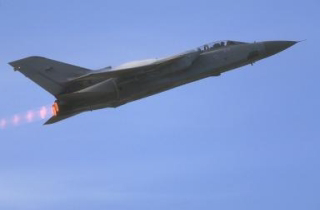

Scaling image


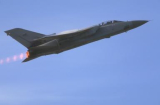

Rotation (45 degree) image


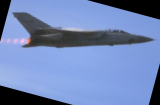

Translation (x:+30, y:+20) image


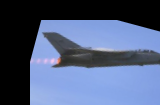

In [7]:
drive.mount('/content/gdrive') 
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/airplane.bmp')


resize = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)# 1/2 크기 변환

height,width = resize.shape[:2]
# 회전점을 영상 모서리 -> 영상의 중심으로 변경
M = cv2.getRotationMatrix2D(((width-1)/2.0,(height-1)/2.0),-15,1)
rotate = cv2.warpAffine(resize,M,(width,height))# -15도 회전변환

M = np.float32([[1,0,30],[0,1,+20]])
translate = cv2.warpAffine(rotate,M,(width,height))# (30,20)이동변환

print("Original image")
cv2_imshow(img) # BGR형식으로 영상 출력가능해서 변환 필요 없음
print("Scaling image")
cv2_imshow(resize)
print("Rotation (45 degree) image")
cv2_imshow(rotate)
print("Translation (x:+30, y:+20) image")
cv2_imshow(translate)